In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

In [3]:
type(iris.data)

numpy.ndarray

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.data[5, :]

array([5.4, 3.9, 1.7, 0.4])

In [6]:
iris.data[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
iris.target.shape

(150,)

In [8]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [9]:
len(iris.target == 0)

150

In [10]:
np.array(iris.target == 1).astype(np.int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

In [12]:
type(y)

numpy.ndarray

In [13]:
len(y)

150

In [14]:
iris.target[iris.target == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [15]:
per_clf = Perceptron()

In [16]:
per_clf.fit(X, y)

Perceptron()

In [17]:
y_pred = per_clf.predict([[2, 0.5]])

In [18]:
y_pred

array([0])

In [19]:
import tensorflow as tf
from tensorflow import keras

In [20]:
tf.__version__

'2.3.0'

In [21]:
keras.__version__

'2.4.0'

In [22]:
fashion_mnist = keras.datasets.fashion_mnist

In [23]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [24]:
type(X_train_full)

numpy.ndarray

In [25]:
type(y_train_full)

numpy.ndarray

In [26]:
X_train_full.shape

(60000, 28, 28)

In [27]:
X_train_full.dtype

dtype('uint8')

In [28]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [29]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
              "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [30]:
class_names[y_train[0]]

'Coat'

In [31]:
X_train[0].shape

(28, 28)

In [32]:
X_train[0].reshape(-1, 28*28).shape

(1, 784)

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.layers

In [36]:
hidden_1 = model.layers[1]

In [37]:
hidden_1.name

'dense'

In [38]:
model.get_layer('dense') is hidden_1

True

In [39]:
weights, biases = hidden_1.get_weights()

In [40]:
weights

array([[ 0.05543676,  0.01891662, -0.04858528, ...,  0.03644942,
         0.02922136,  0.03146841],
       [-0.05327525,  0.00099442,  0.07070938, ...,  0.03315563,
         0.07345873,  0.02303138],
       [ 0.00033549, -0.02873584,  0.01108424, ..., -0.07178486,
        -0.05850256, -0.05153861],
       ...,
       [-0.03127364, -0.03436711,  0.02575455, ..., -0.06424819,
        -0.04397553, -0.03916163],
       [ 0.00142325,  0.04152057, -0.07278916, ...,  0.05636533,
        -0.05111301,  0.01169038],
       [-0.04775389,  0.01775251, -0.04670123, ...,  0.05661316,
        -0.0227044 , -0.0106897 ]], dtype=float32)

In [41]:
weights.shape

(784, 300)

In [42]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [43]:
biases.shape

(300,)

In [44]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "sgd", 
             metrics = ["accuracy"])

In [45]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7137 - accuracy: 0.7646 - val_loss: 0.5146 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4861 - accuracy: 0.8302 - val_loss: 0.4398 - val_accuracy: 0.8482
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4414 - accuracy: 0.8458 - val_loss: 0.4149 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4135 - accuracy: 0.8543 - val_loss: 0.3886 - val_accuracy: 0.8684
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3934 - accuracy: 0.8614 - val_loss: 0.4090 - val_accuracy: 0.8546
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3771 - accuracy: 0.8675 - val_loss: 0.3660 - val_accuracy: 0.8738
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3637 - accuracy: 0.8728 - val_loss: 0.4009 - val_accuracy:

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.713708,0.764618,0.514600,0.8206
1,0.486053,0.830236,0.439764,0.8482
2,0.441442,0.845782,0.414857,0.8580
3,0.413498,0.854273,0.388591,0.8684
4,0.393377,0.861436,0.408992,0.8546
5,0.377144,0.867455,0.366046,0.8738
6,0.363702,0.872800,0.400943,0.8554
7,0.351100,0.875636,0.351278,0.8746
8,0.341203,0.879600,0.343567,0.8754
9,0.331690,0.881945,0.344072,0.8790


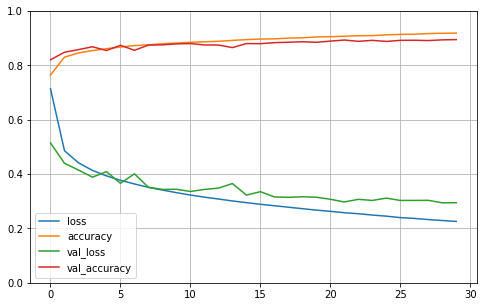

In [48]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [49]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [50]:
history

In [51]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [52]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8878


[0.32154524326324463, 0.8877999782562256]

In [53]:
X_new = X_test[:3]

In [54]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [55]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [56]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [57]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
housing = fetch_california_housing()

In [59]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, 
                                                              housing.target)

In [60]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full)

In [61]:
type(X_train)

numpy.ndarray

In [62]:
X_train.shape, X_test.shape

((11610, 8), (5160, 8))

In [63]:
scaler = StandardScaler()

In [64]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [65]:
model = keras.models.Sequential([keras.layers.Dense(30, activation = "relu", 
                                                   input_shape = X_train.shape[1:]), 
                                keras.layers.Dense(1)])

In [66]:
model.compile(loss="mean_squared_error", optimizer = "sgd")

In [67]:
history = model.fit(X_train, y_train, epochs=20, 
                   validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8021 - val_loss: 1.1162
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.1138 - val_loss: 0.4625
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4195 - val_loss: 0.4213
Epoch 4/20
363/363 [==============================] - 0s 975us/step - loss: 0.3919 - val_loss: 0.4053
Epoch 5/20
363/363 [==============================] - 0s 958us/step - loss: 0.3832 - val_loss: 0.4012
Epoch 6/20
363/363 [==============================] - 0s 951us/step - loss: 0.3734 - val_loss: 0.3934
Epoch 7/20
363/363 [==============================] - 0s 915us/step - loss: 0.3657 - val_loss: 0.3882
Epoch 8/20
363/363 [==============================] - 0s 948us/step - loss: 0.3615 - val_loss: 0.3851
Epoch 9/20
363/363 [==============================] - 0s 923us/step - loss: 0.3577 - val_loss: 0.3941
Epoch 10/20
363/363 [==============================] - 0s 919us/step - loss: 0.3565 - va

In [68]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 676us/step - loss: 0.3804


In [69]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [70]:
y_pred

array([[3.8704352],
       [2.9205496],
       [0.9909396]], dtype=float32)

In [71]:
y_test[:3]

array([3.398, 3.515, 0.877])

### Deep-Wide Network Implementation

In [72]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden_1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden_2 = keras.layers.Dense(30, activation = "relu")(hidden_1)
concat = keras.layers.Concatenate()([input_, hidden_2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output])

In [73]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]         

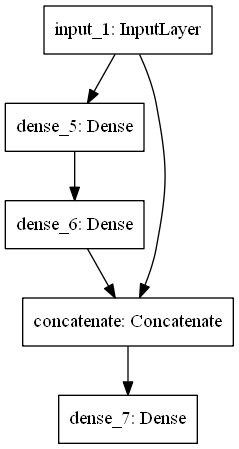

In [74]:
keras.utils.plot_model(model, "deep-wide-model.png")

In [75]:
#pip install pydot

In [ ]:
#pip install graphviz

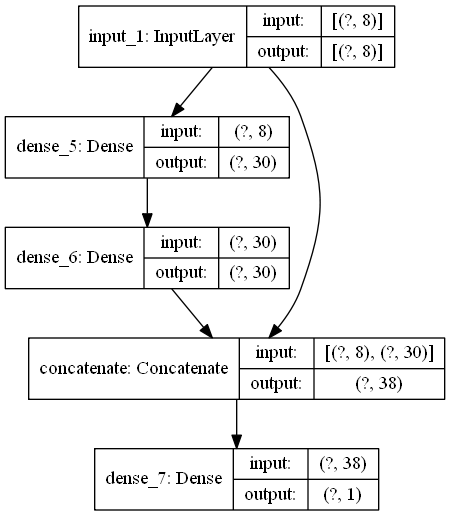

In [76]:
keras.utils.plot_model(model, "deep-wide-model.png", show_shapes=True)

In [ ]:
model.compile(loss="mean_squared_error", optimizer = "sgd")

In [ ]:
history = model.fit(X_train, y_train, epochs=20, 
                   validation_data=(X_valid, y_valid))

In [ ]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [ ]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [ ]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                   validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

In [ ]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [ ]:
model = WideAndDeepModel()